In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import seaborn as sns

In [13]:
df = pd.read_csv("Synthetic_Financial_datasets_log.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [15]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [16]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [17]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [20]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [21]:
payment_mapping = {
    'PAYMENT': 0,
    'TRANSFER': 1,
    'CASH_OUT': 2,
    'DEBIT' : 3,
    'CASH_IN' : 4
}

df['type'] = df['type'].map(payment_mapping)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,2,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,0,11668.14,41554.0,29885.86,0.0,0.0,0,0


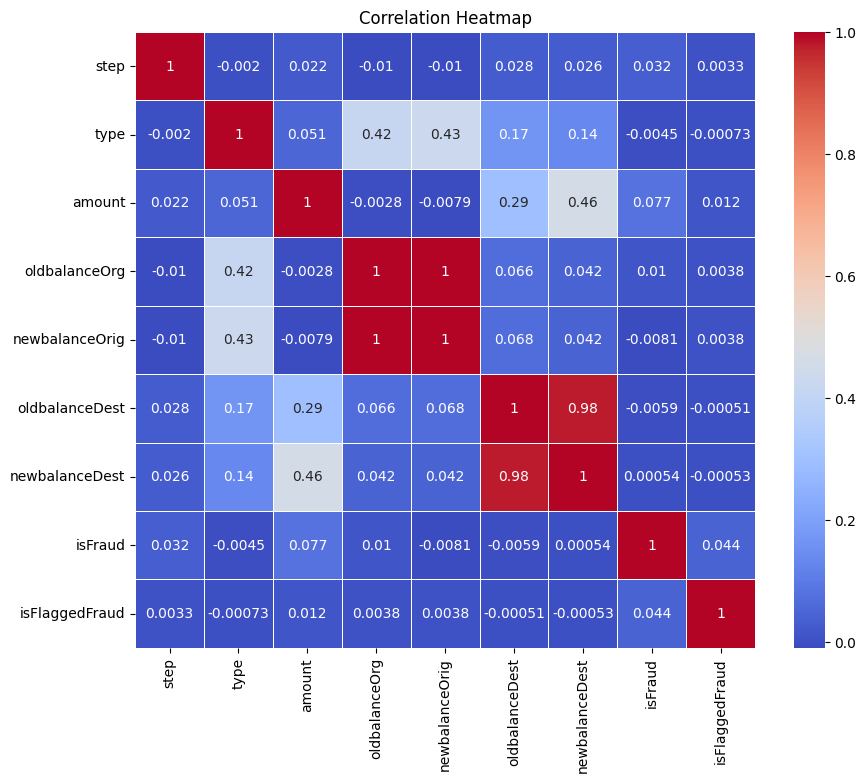

In [22]:
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['amount', 'oldbalanceOrg', 'oldbalanceDest']] = scaler.fit_transform(df[['amount', 'oldbalanceOrg', 'oldbalanceDest']])

In [24]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,0,-0.281560,-0.229810,160296.36,-0.323814,0.0,0,0
1,1,0,-0.294767,-0.281359,19384.72,-0.323814,0.0,0,0
2,1,1,-0.297555,-0.288654,0.00,-0.323814,0.0,1,0
3,1,2,-0.297555,-0.288654,0.00,-0.317582,0.0,1,0
4,1,0,-0.278532,-0.274329,29885.86,-0.323814,0.0,0,0


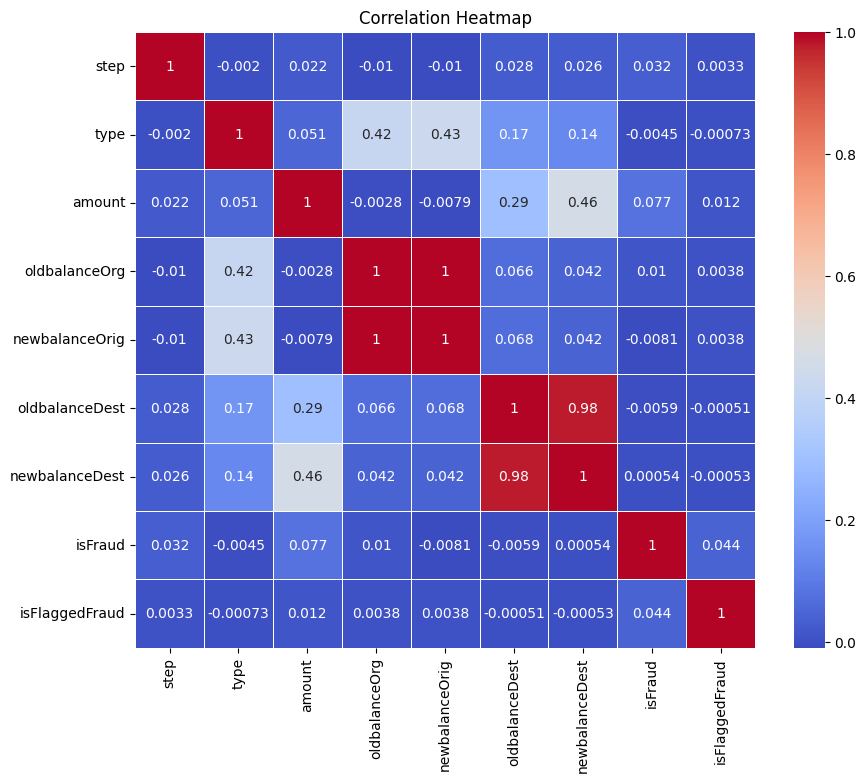

In [25]:
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
df['amount_to_oldbalanceOrg'] = df['amount'] / (df['oldbalanceOrg'] + 1e-10)  # Adding a small value to avoid division by zero

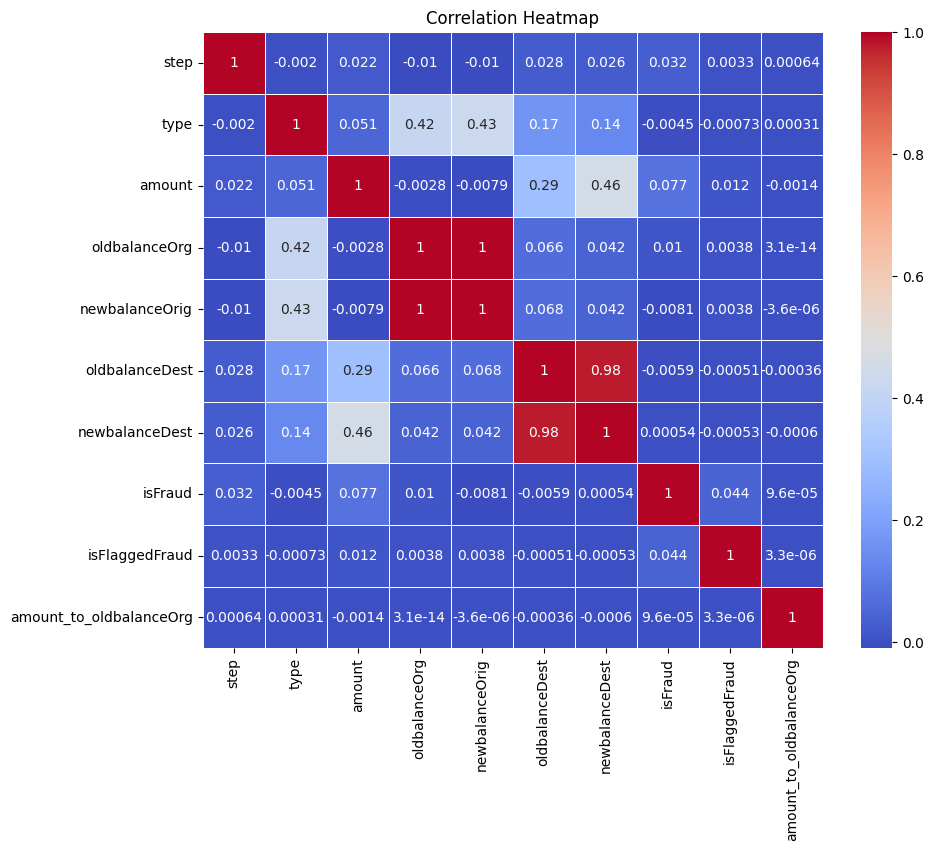

In [27]:
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [28]:
df['amount_to_oldbalanceDest'] = df['amount'] / (df['oldbalanceDest'] + 1e-10)
df['old_to_new_balance_ratio'] = df['oldbalanceOrg'] / (df['newbalanceOrig'] + 1e-10)


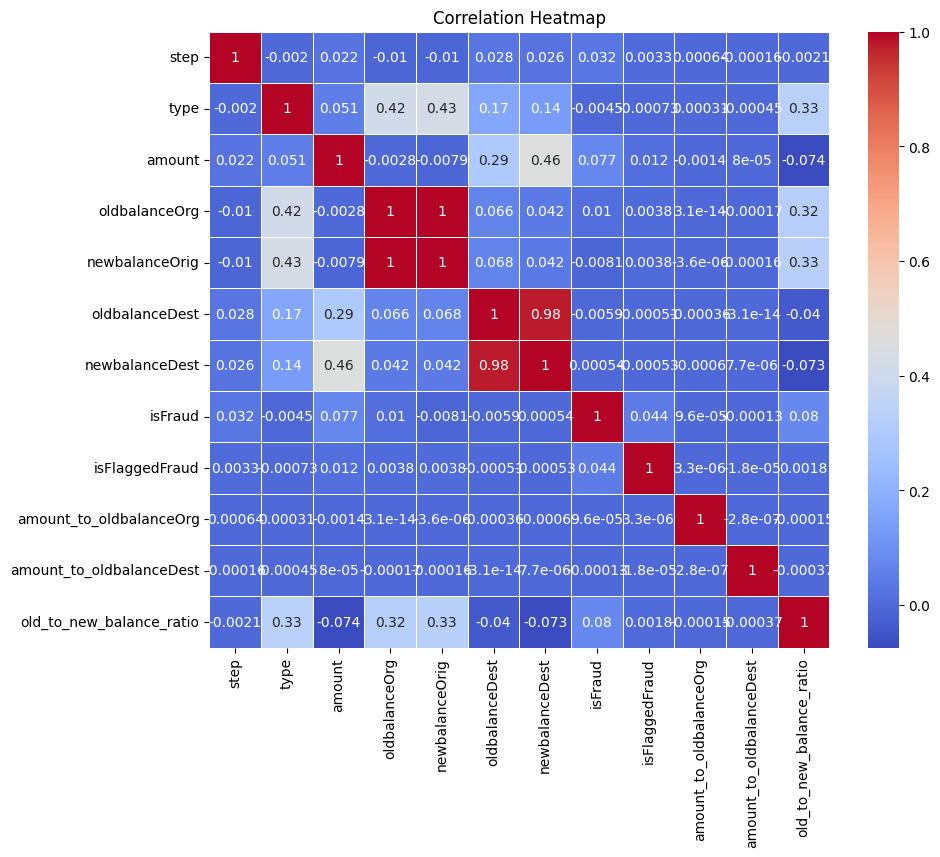

In [29]:
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [30]:
df['oldbalanceOrg_minus_amount'] = df['oldbalanceOrg'] - df['amount']
df['oldbalanceDest_minus_amount'] = df['oldbalanceDest'] - df['amount']


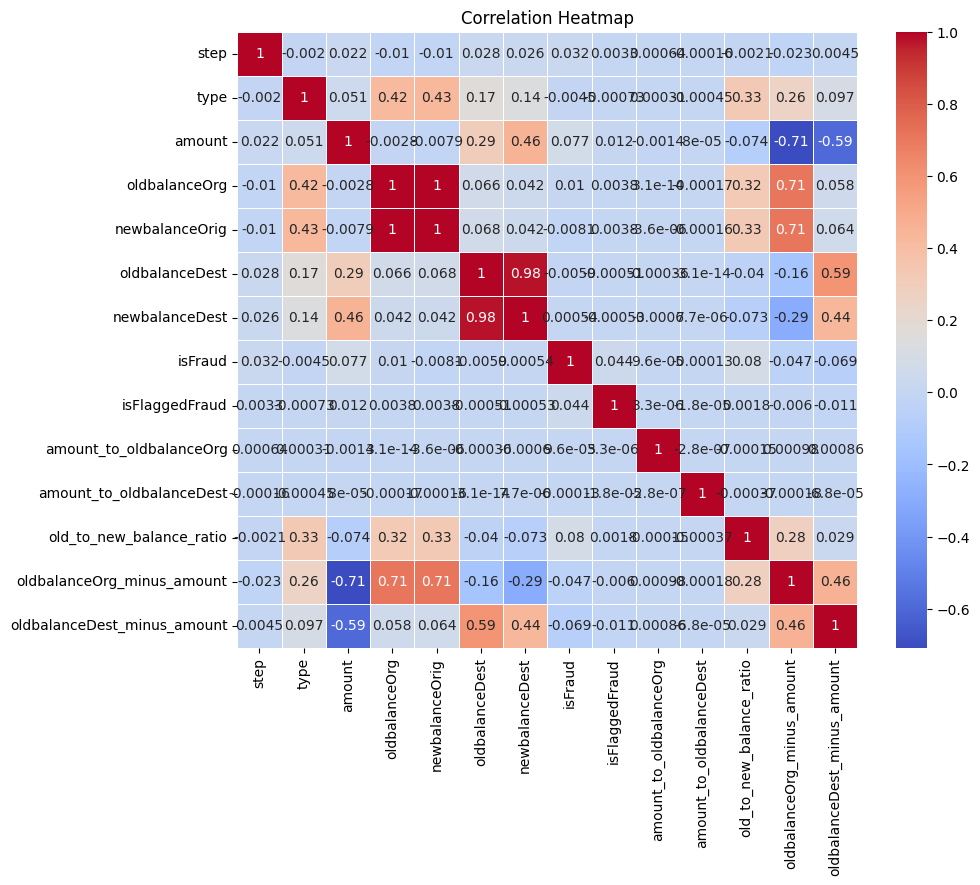

In [31]:
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

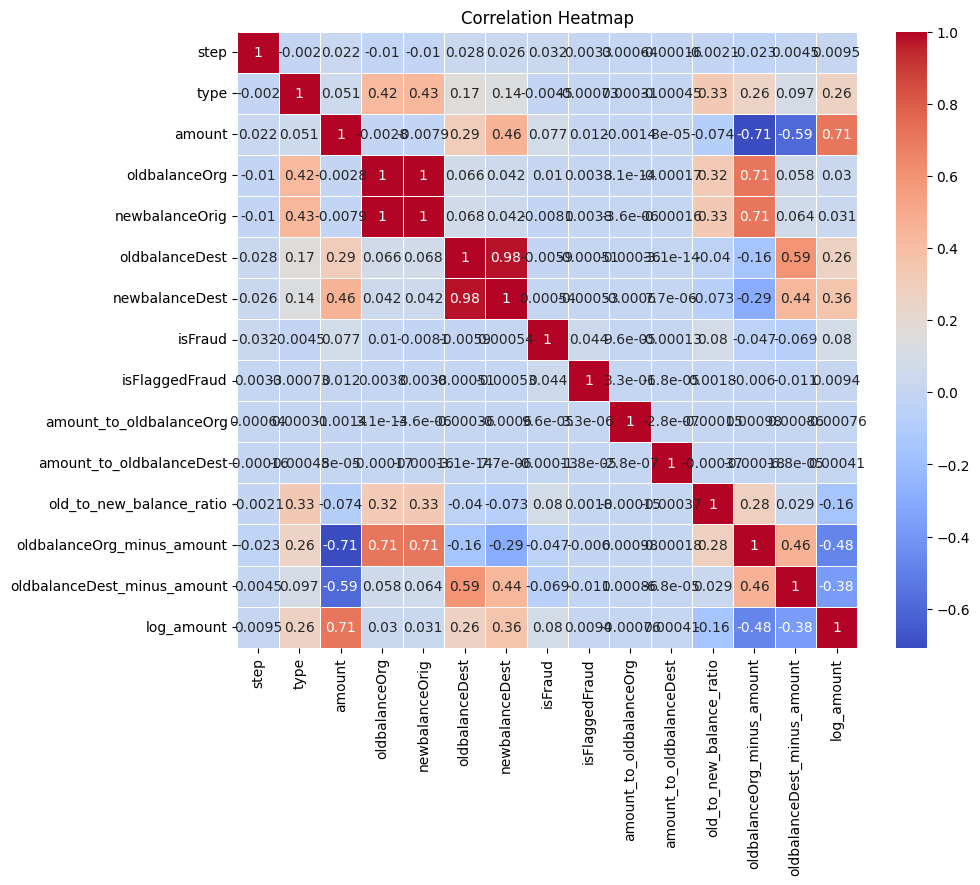

In [32]:
df['log_amount'] = np.log1p(df['amount'])
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

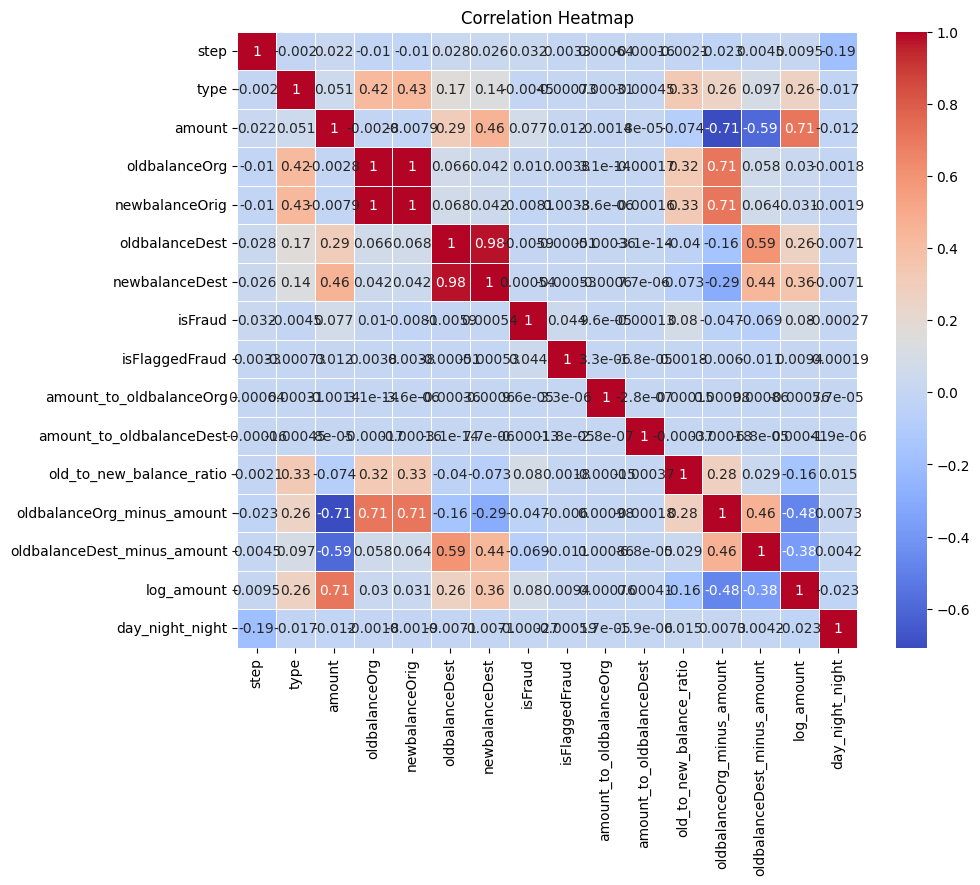

In [33]:
df['day_night'] = df['step'].apply(lambda x: 'night' if (0 <= x <= 7) or (20 <= x <= 23) else 'day')
df = pd.get_dummies(df, columns=['day_night'], drop_first=True)
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [34]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
df[['amount', 'oldbalanceOrg', 'oldbalanceDest']] = qt.fit_transform(df[['amount', 'oldbalanceOrg', 'oldbalanceDest']])

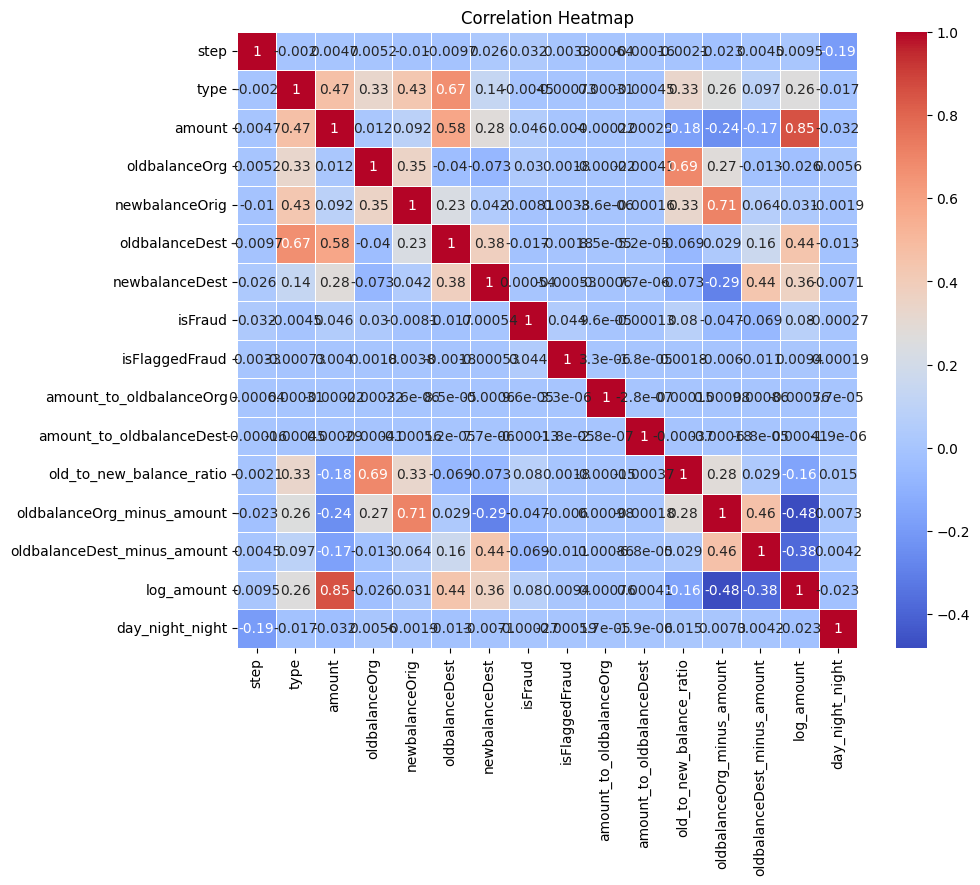

In [35]:
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [37]:
columns_to_drop = ['day_night', 'amount_to_oldbalanceDest', 'amount_to_oldbalanceOrg']
df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)

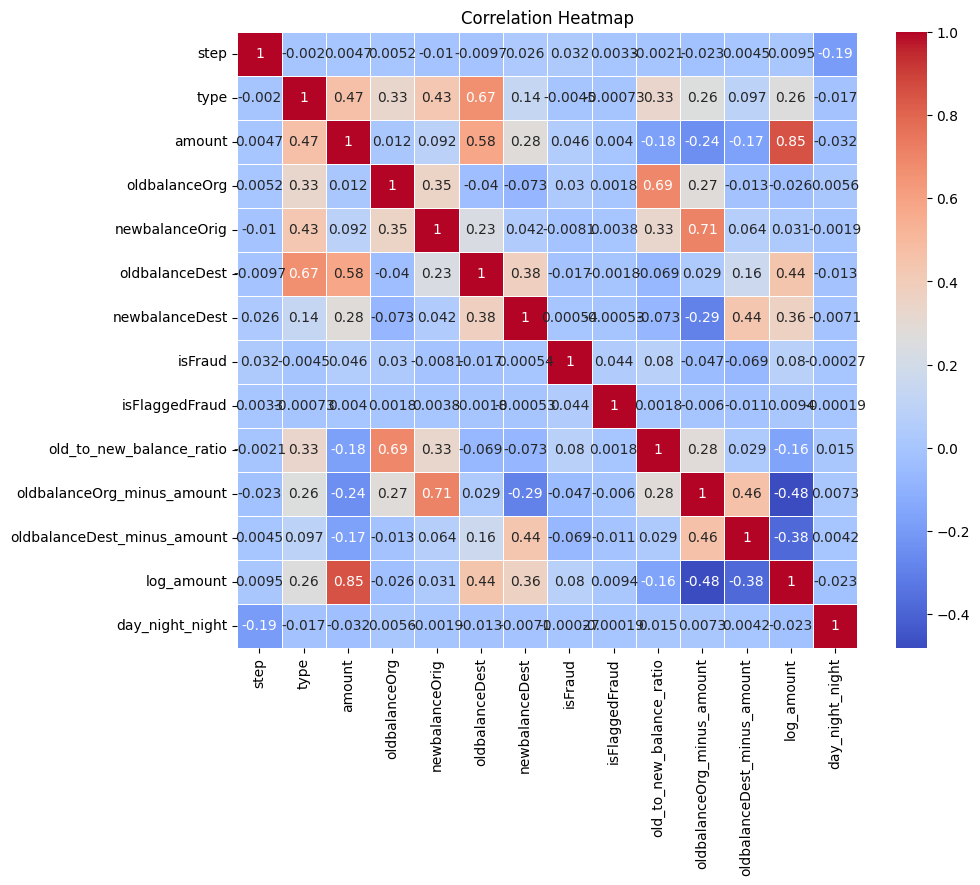

In [39]:
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [40]:
columns_to_drop = ['day_night', 'amount_to_oldbalanceDest', 'amount_to_oldbalanceOrg']
df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)

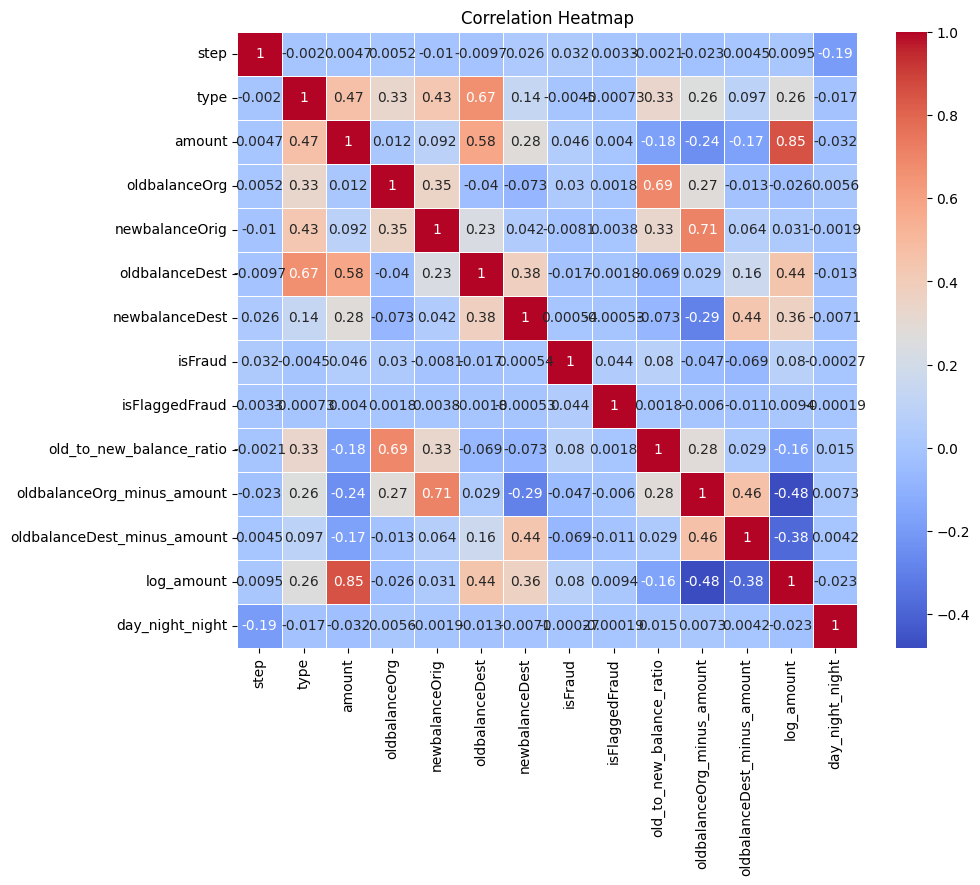

In [41]:
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [42]:
columns_to_drop = ['day_night_night', 'newbalanceDest', 'odlbalanceDest']
df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)

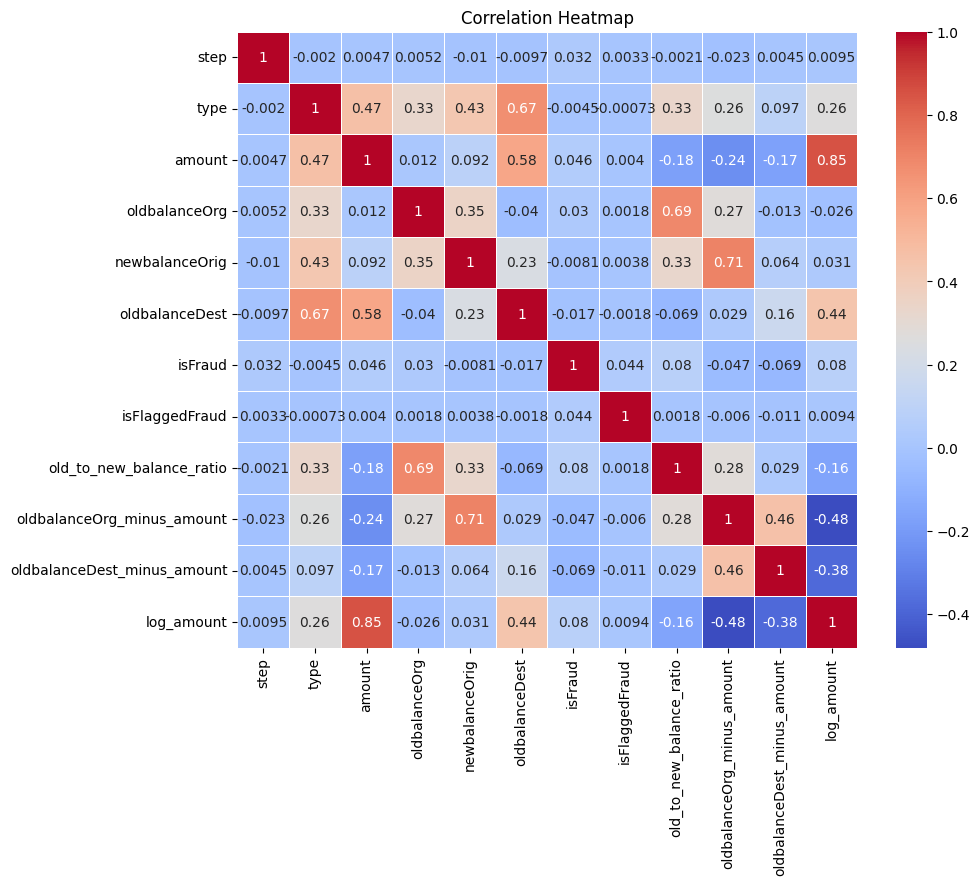

In [43]:
corr_matrix = df.corr(numeric_only=True)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [45]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFraud,isFlaggedFraud,old_to_new_balance_ratio,oldbalanceOrg_minus_amount,oldbalanceDest_minus_amount,log_amount
0,1,0,-0.834680,0.802447,160296.36,-5.199338,0,0,-1.433657e-06,0.051750,-0.042254,-0.330673
1,1,0,-1.713992,0.142080,19384.72,-5.199338,0,0,-1.451449e-05,0.013408,-0.029047,-0.349227
2,1,1,-2.594887,-0.388000,0.00,-5.199338,1,0,-2.886538e+09,0.008901,-0.026259,-0.353188
3,1,2,-2.594887,-0.388000,0.00,-0.144754,1,0,-2.886538e+09,0.008901,-0.020028,-0.353188
4,1,0,-0.737664,0.358365,29885.86,-5.199338,0,0,-9.179229e-06,0.004203,-0.045282,-0.326467


In [ ]:
def time_of_day(step):
    if 6 <= step % 24 < 12:
        return 0
    elif 12 <= step % 24 < 18:
        return 1
    elif 18 <= step % 24 < 24:
        return 2
    else:
        return 3

df['time_of_day'] = df['step'].apply(time_of_day)
